In [1]:
#Setting seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

# Importing the dependencies

In [2]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import models

Data Curation
kaggle file link : https://www.kaggle.com/datasets/ai21ds06anilriswal/terrain-dataset

In [3]:
kaggle_credentials = json.load(open("kaggle.json"))

In [4]:
#setup Kaggle API key as enviroment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentials['username']
os.environ['KAGGLE_KEY'] = kaggle_credentials['key']

In [5]:
!kaggle datasets download -d ai21ds06anilriswal/terrain-dataset

100% 238M/239M [00:15<00:00, 18.0MB/s]
100% 239M/239M [00:15<00:00, 16.2MB/s]


In [6]:
!ls

kaggle.json  sample_data  terrain-dataset.zip


In [8]:
#unzip the downloaded dataset
with ZipFile("terrain-dataset.zip",'r') as zip_ref:
  zip_ref.extractall()

In [9]:
print(os.listdir('terrain dataset'))

print(len(os.listdir("terrain dataset/Grassy_Terrain")))
print(os.listdir("terrain dataset/Grassy_Terrain")[:5])

print(len(os.listdir("terrain dataset/Marshy_Terrain")))
print(os.listdir("terrain dataset/Marshy_Terrain")[:5])

print(len(os.listdir("terrain dataset/Other_Image")))
print(os.listdir("terrain dataset/Other_Image")[:5])

print(len(os.listdir("terrain dataset/Rocky_Terrain")))
print(os.listdir("terrain dataset/Rocky_Terrain")[:5])

print(len(os.listdir("terrain dataset/Sandy_Terrain")))
print(os.listdir("terrain dataset/Sandy_Terrain")[:5])

['Grassy_Terrain', 'Sandy_Terrain', 'Other_Image', '.ipynb_checkpoints', 'Marshy_Terrain', 'Rocky_Terrain']
395
['Grassy_Terrain (72).jpg', 'Grassy_Terrain (288).jpg', 'Grassy_Terrain (334).jpg', 'Grassy_Terrain (272).jpg', 'Grassy_Terrain (395).jpg']
394
['Marshy_Terrain (189).jpg', 'Marshy_Terrain (239).jpg', 'Marshy_Terrain (111).jpg', 'Marshy_Terrain (154).jpg', 'Marshy_Terrain (320).jpg']
400
['Other_image (855).jpg', 'Other_image (515).jpg', 'Other_image (820).jpg', 'Other_image (527).jpg', 'Other_image (597).jpg']
400
['s (9).jpg', 's (466).jpg', 's (283).jpg', 's (356).jpg', 's (10).jpg']
400
['sandy_terrain (243).jpg', 'sandy_terrain (34).jpg', 'sandy_terrain (271).jpg', 'sandy_terrain (371).jpg', 'sandy_terrain (14).jpg']


# Data Preprocessing

In [10]:
base_dir = 'terrain dataset/'

(4000, 6000, 3)


<function matplotlib.pyplot.show(close=None, block=None)>

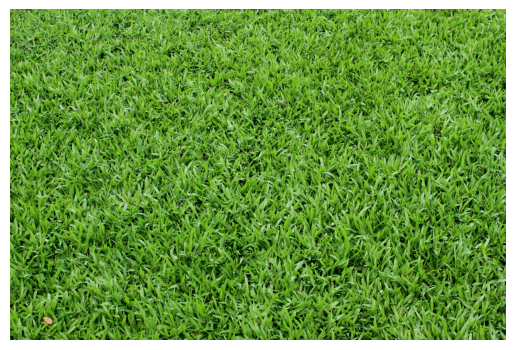

In [11]:
image_path= '/content/terrain dataset/Grassy_Terrain/Grassy_Terrain (1).jpg'

#Read the image
img = mpimg.imread(image_path)

print(img.shape)
#displaying the image
plt.imshow(img)
plt.axis('off') ## turn off the axis numbers
plt.show

In [12]:
#image parameter
img_size = 224
batch_size = 32

Train Test Split

In [13]:
#Image Data Generator
data_gen = ImageDataGenerator(
     rescale = 1/255,
     validation_split=0.2 #use 20% of data for validation
 )

In [14]:
#Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size = (img_size,img_size),
    batch_size = batch_size,
    subset = 'training',
    class_mode = 'categorical'
)

Found 1592 images belonging to 6 classes.


In [15]:
#Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size,img_size),
    batch_size = batch_size,
    subset = 'validation',
    class_mode = 'categorical'
)

Found 397 images belonging to 6 classes.


Convolutional Neural Network

In [16]:
#Model Defination
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(img_size,img_size,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

In [17]:
##getting model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 256)               4

In [18]:
##compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model Training

In [19]:
##Training the model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples//batch_size, ##number of steps per epoch
    epochs = 5,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples//batch_size #Validation steps
)

Epoch 1/5
49/49 [==============================] - 27s 447ms/step - loss: 3.3469 - accuracy: 0.4744 - val_loss: 0.8602 - val_accuracy: 0.6849
Epoch 2/5
49/49 [==============================] - 17s 356ms/step - loss: 0.5868 - accuracy: 0.7936 - val_loss: 0.4650 - val_accuracy: 0.8594
Epoch 3/5
49/49 [==============================] - 21s 433ms/step - loss: 0.3627 - accuracy: 0.8744 - val_loss: 0.3866 - val_accuracy: 0.8724
Epoch 4/5
49/49 [==============================] - 16s 321ms/step - loss: 0.2452 - accuracy: 0.9224 - val_loss: 0.6451 - val_accuracy: 0.8021
Epoch 5/5
49/49 [==============================] - 21s 435ms/step - loss: 0.1404 - accuracy: 0.9654 - val_loss: 0.4082 - val_accuracy: 0.8516


In [20]:
  #Model Evalution
print("Evaluating Model...")
val_loss, val_accuracy = model.evaluate(validation_generator,steps = validation_generator.samples //batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating Model...
12/12 [==============================] - 6s 535ms/step - loss: 0.4010 - accuracy: 0.8568
Validation Accuracy: 85.68%


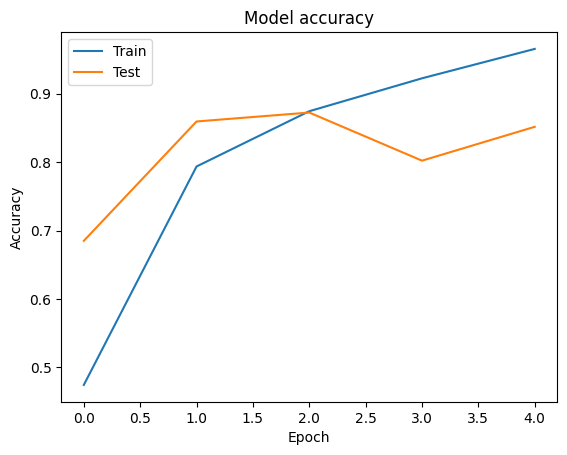

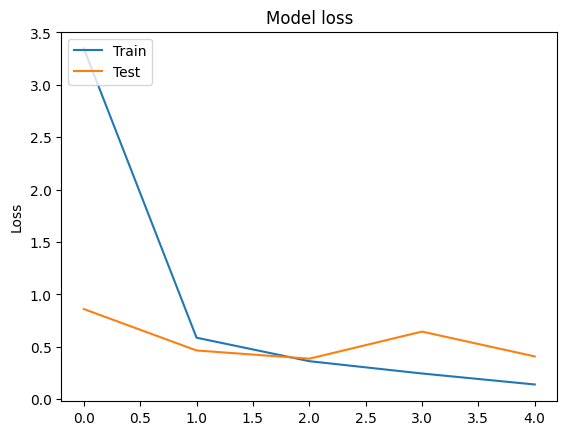

In [21]:
#Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

#PLot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

In [22]:
#Function to load and preprocess the image using pillow
def load_and_preprocess_image(image_path,target_size=(224,224)):
  #load the image
  img = Image.open(image_path)
  #resize the image
  img = img.resize(target_size)
  #convert the image to a numpy array
  img_array = np.array(img)
  #add batch dimension
  img_array = np.expand_dims(img_array,axis=0)
  #Scale the image values to [0,1]
  img_array = img_array.astype('float32')/255.
  return img_array

#Function to predict the class of an image
def predict_image_class(model,image_path,class_indices):
  preprocessed_img = load_and_preprocess_image(image_path)
  predictions = model.predict(preprocessed_img)
  predicted_class_index = np.argmax(predictions,axis=1)[0]
  predicted_class_name = class_indices[predicted_class_index]
  return predicted_class_name

In [23]:
#create a mapping from class indices to class name
class_indices = {v:k for k,v in train_generator.class_indices.items()}

In [24]:
class_indices

{0: '.ipynb_checkpoints',
 1: 'Grassy_Terrain',
 2: 'Marshy_Terrain',
 3: 'Other_Image',
 4: 'Rocky_Terrain',
 5: 'Sandy_Terrain'}

In [25]:
#saving the class name as json file
json.dump(class_indices, open('class_indices.json','w'))

In [26]:
#Example Usage
#image_path = '/content/Marshy_Terrain (1).jpg'
#image_path = '/content/Other_image (1).jpg'
#image_path = '/content/s (1).jpg'
image_path = '/content/sandy_terrain (1).jpg'

predicted_class_name = predict_image_class(model,image_path,class_indices)

#OUtput the result
print("Predicted Class Name : ",predicted_class_name)

1/1 [==============================] - 0s 357ms/step
Predicted Class Name :  Sandy_Terrain


In [27]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
model.save('/content/drive/MyDrive/Terrain Classification/terrain_classification_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
